DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

df = pd.DataFrame({
    'User_ID': range(1, n+1),
    'Group': np.random.choice(['A', 'B'], size=n, p=[0.5, 0.5]),
    'Converted': np.nan
})

# Group A: 11% conversion, Group B: 14% conversion
df.loc[df['Group'] == 'A', 'Converted'] = np.random.binomial(1, 0.11, size=(df['Group'] == 'A').sum())
df.loc[df['Group'] == 'B', 'Converted'] = np.random.binomial(1, 0.14, size=(df['Group'] == 'B').sum())

df.to_csv("ab_test_checkout.csv", index=False)


## Tasks:
1. Compute conversion rates for Group A and B.

2. Conduct a two-proportion z-test to check if the difference is statistically significant.

3. Visualize conversions using a bar plot with error bars.

4. Conclude:

    - Is B significantly better?
    - Should we roll it out?



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_ID    1000 non-null   int64  
 1   Group      1000 non-null   object 
 2   Converted  1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [3]:
df.head()

,User_ID,Group,Converted
0,1,A,0.0
1,2,B,0.0
2,3,B,0.0
3,4,B,0.0
4,5,A,0.0


In [13]:
df['Converted'].sum()

np.float64(116.0)

In [12]:
df.groupby('Group')['Converted'].sum()

Group
A    55.0
B    61.0
Name: Converted, dtype: float64

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [31]:
conversion_rates = df.groupby('Group')['Converted'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 Group
A    0.109344
B    0.122736
Name: Converted, dtype: float64


In [24]:
from statsmodels.stats.proportion import proportions_ztest

successes = [df[df['Group'] == 'A']['Converted'].sum(), df[df['Group'] == 'B']['Converted'].sum()]
n_obs = [df[df['Group'] == 'A'].shape[0], df[df['Group'] == 'B'].shape[0]]

stat, pval = proportions_ztest(successes, n_obs)


In [25]:
stat, pval

(np.float64(-0.6612537307432664), np.float64(0.5084496087000363))

In [33]:
if pval < 0.05:
    print("\nResult: The difference is statistically significant (p < 0.05).")
    print("Recommendation: Group B has higher conversion — consider rolling it out.")
else:
    print("\nResult: The difference is NOT statistically significant (p ≥ 0.05).")
    print("Recommendation: Stick to current version or collect more data.")


Result: The difference is NOT statistically significant (p ≥ 0.05).
Recommendation: Stick to current version or collect more data.


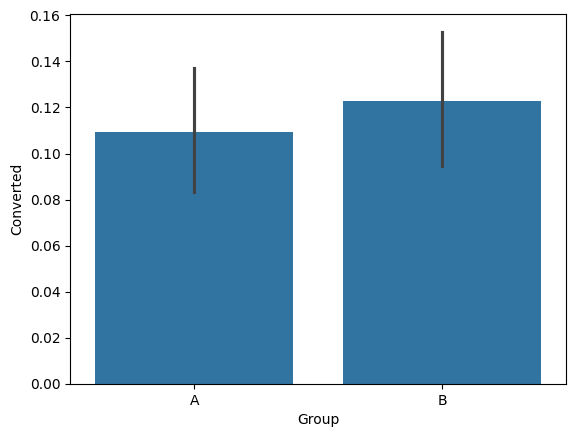

In [27]:
sns.barplot(data=df, x='Group', y='Converted', errorbar=('ci', 95))
plt.show()